# Häufigkeit und Verteilung der Commits im Build

In [1]:
import dask.dataframe as dd
import pandas as pd
df = dd.read_csv('data/travistorrent_11_1_2017.csv',blocksize=25000000,usecols=['tr_build_id','git_num_all_built_commits'])
pdf = df.drop_duplicates().compute()
pdf['git_num_all_built_commits'].describe()

count    680209.000000
mean          1.807342
std          60.138829
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       33410.000000
Name: git_num_all_built_commits, dtype: float64

Populating the interactive namespace from numpy and matplotlib


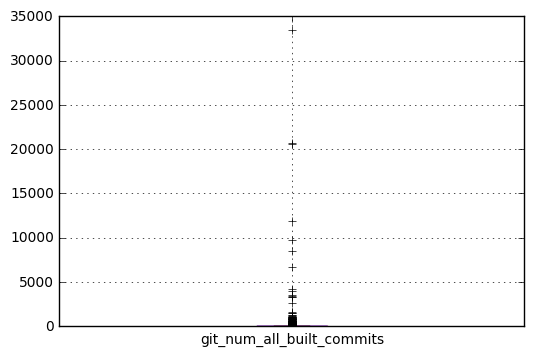

In [2]:
%pylab inline
pdf.boxplot('git_num_all_built_commits')

In [3]:
pdf_just_one_commit = pdf[pdf.git_num_all_built_commits == 1]
pdf_just_one_commit['git_num_all_built_commits'].describe() # größtenteils unspektakulär, aber einfacher Weg für count

count    557211.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: git_num_all_built_commits, dtype: float64

In [10]:
float(557211)/680209*100

81.91761649728245

Ergebnis: Die meisten Builds beinhalten nur 1 Commit (557.211 von 680.209, also ~82%). Es gibt jedoch auch Builds mit unerwartet hohen Commit Zahlen (~35.000).

## Betrachtung einer Range

In [15]:
pdfrange = pdf[(pdf.git_num_all_built_commits > 10) & (pdf.git_num_all_built_commits <500)]

Populating the interactive namespace from numpy and matplotlib


C:\Users\haup_ca\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0xb2256d8>],
 'caps': [<matplotlib.lines.Line2D at 0xb22bf60>,
 'fliers': [<matplotlib.lines.Line2D at 0xb233908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb22fa20>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb225978>,
  <matplotlib.lines.Line2D at 0xb22b940>]}

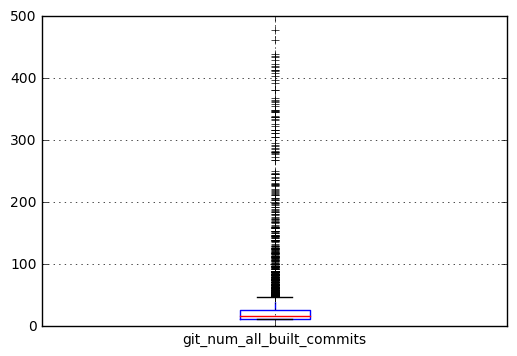

In [16]:
%pylab inline
pdfrange.boxplot('git_num_all_built_commits')

In [17]:
pdfrange['git_num_all_built_commits'].describe()

count    5012.000000
mean       29.660215
std        45.380399
min        11.000000
25%        12.000000
50%        16.000000
75%        26.000000
max       478.000000
Name: git_num_all_built_commits, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE349E8>]], dtype=object)

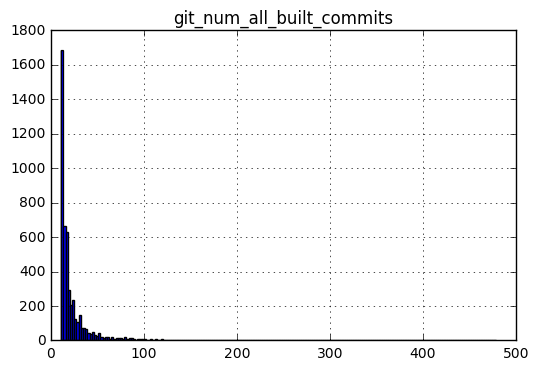

In [18]:
pdfrange.hist(column='git_num_all_built_commits',bins=200)

Ergebnis: Die meisten Builds beinhalten nur wenige Commits. Hier kann man sich die Verteilung je nach gewählter Range anschauen.


# Verteilung der Commits auf Build pro PROJEKT

In [22]:
import dask.dataframe as dd
import pandas as pd

def sloc_percent(row):
    # calculate percentage of changes lines of source code
    row['sloc_percent'] = 100*(row.git_diff_src_churn.astype('float')/row.gh_sloc.astype('float'))
    return row
    

df = dd.read_csv('data/travistorrent_11_1_2017.csv',blocksize=25000000,usecols=['tr_build_id','gh_project_name','git_num_all_built_commits','gh_is_pr','git_trigger_commit','gh_sloc','git_diff_src_churn','gh_diff_files_added','gh_diff_files_deleted','gh_diff_files_modified'])
pdf = df.drop_duplicates().map_partitions(sloc_percent).compute()

## Absteigend (Große Anzahl Commits)

In [21]:
pdf.sort_values('git_num_all_built_commits',inplace=True,ascending=False)
pdf.head(20)

,tr_build_id,gh_project_name,gh_is_pr,git_num_all_built_commits,git_trigger_commit,git_diff_src_churn,gh_diff_files_added,gh_diff_files_deleted,gh_diff_files_modified,gh_sloc,sloc_precent
18417,7433531,FenixEdu/fenixedu-academic,False,33410,ec932579f1b4bb4d65514af8015e864d2b682b77,5278263,24440,8993,20925,598335,882.158490
22136,18316469,ruby/ruby,False,20728,a161f1243550930a38028d58ed6d5f2ae9b6a38b,1656517,4445,1041,3153,366875,451.520818
19887,417490,ruby/ruby,False,20578,63783f2c9735c6ce9605fde4c658ac9cd6df4c8b,1651401,4511,1004,3148,366818,450.196283
25321,97503617,apache/sling,False,11851,39b5cee1deba043e166fc78d2c907c3db597a340,834545,6394,1828,5525,259661,321.397900
7615,578024,ruby/ruby,False,9742,087b9f941782eaee566197d61b8d7f471a3d9a64,977041,2999,397,1875,195097,500.797552
5610,343348,ruby/ruby,False,8460,20c8803697df39a086175a5eb2f8e8ee00bf1e2f,980135,2910,407,1822,177953,550.783072
1166,7165274,orbeon/orbeon-forms,False,6696,669ed9c29ce81675f5bb0cd0a8843968484a607a,366155,4081,1795,2134,67729,540.617756
29188,1494869,CloudifySource/cloudify,False,4178,4d48ae7f41c6fc015be3e81d0d2e34e6ed301462,176959,1633,448,848,28589,618.975830
5611,343364,ruby/ruby,False,4002,c36ee7bd385991f4eda57b043379ced9a7c21d1b,152806,361,84,1575,375237,40.722530
27344,17741198,apache/jackrabbit-oak,False,3586,eaad6eb7157c4354553285e871f90af44c6fdd65,395451,1348,474,1378,63677,621.026430


Ergebnis: Builds mit sehr hohen Commit-Zahlen sind meist durch eines der folgenden Szenarien zu erklären:
        * TravisCI eingeführt
        * TravisCI in PR eingeführt (bei tr_is_pr == True)
        * SVN-Git-Transfer
        * Umzug Branch
        * ...
        Diese Szenarien haben wir duch manuelle überprüfung des letzten Commits erhalten.
        In all diesen Fällen wird zum letzten, ggf. nicht existentem, Build zurück gegangen. Die hohen Prozentzahlen bei den geänderten Source Code Zeilen bestätigen diese Vermutung.
TODO: Thesis durch Fakten belegen. Diese müssten aus GitHub direkt gezogen werden.

## Aufsteigend (Kleine Anzahl Commits)

In [49]:
pdf.sort_values('git_num_all_built_commits',inplace=True,ascending=True)
pdf.head(20)

,tr_build_id,gh_project_name,gh_is_pr,git_num_all_built_commits,git_trigger_commit,gh_diff_files_added,gh_diff_files_deleted,gh_diff_files_modified
5303,72460790,ruby-concurrency/concurrent-ruby,False,1,afea68fb082605433cfecaa3f5df3709d7211069,0,0,1
28350,11461813,maxcom/lorsource,False,1,d84eb84401fc0d734baffc4c8f263cb1fb54d80b,0,0,2
28352,11461819,muffinista/chatterbot,False,1,0fa1632f45d1fd8011336fe0f3bf36e084434c80,0,0,1
28356,11462023,openSUSE/open-build-service,False,1,faba7cd54bd916e5c16512ef0826c7f72ed11e78,0,0,1
28361,11462060,puniverse/quasar,False,1,c8deebf2e4fb5b0a6960dd2205938bf50abc26dc,0,0,3
28362,11462104,inossidabile/protector,False,1,194dadfc8a80069c6b132c0687a008cf1ea56ebe,0,0,1
28365,11462377,inossidabile/protector,False,1,b35bbf46b66c731cef5586aa29eb1ebf6b69b91f,0,0,1
28380,11462541,grosser/fast_gettext,True,1,270c7ade92bbcf83f915f4cbfa49abfe3a7afbac,0,0,1
28378,11462445,maxcom/lorsource,False,1,c64b4e7042faae361eed3e9c04054d01bc12ab70,0,0,1
28420,11463694,maxcom/lorsource,False,1,98de5f198f5c0ed5b5f169857c36567f8d10f10f,0,0,4


Ergebnis: Bei kleinen Commit-Zahlen (hier 1) ist auch die Anzahl der Changes meist sehr niedrig. Weiter nicht betrachtet.